In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [28]:
import os

for root, dirs, files in os.walk('/kaggle/input/ucihar-dataset'):
    for name in files:
        print(os.path.join(root, name))

/kaggle/input/ucihar-dataset/UCI-HAR Dataset/activity_labels.txt
/kaggle/input/ucihar-dataset/UCI-HAR Dataset/README.txt
/kaggle/input/ucihar-dataset/UCI-HAR Dataset/features_info.txt
/kaggle/input/ucihar-dataset/UCI-HAR Dataset/features.txt
/kaggle/input/ucihar-dataset/UCI-HAR Dataset/test/subject_test.txt
/kaggle/input/ucihar-dataset/UCI-HAR Dataset/test/y_test.txt
/kaggle/input/ucihar-dataset/UCI-HAR Dataset/test/X_test.txt
/kaggle/input/ucihar-dataset/UCI-HAR Dataset/test/Inertial Signals/body_acc_y_test.txt
/kaggle/input/ucihar-dataset/UCI-HAR Dataset/test/Inertial Signals/total_acc_y_test.txt
/kaggle/input/ucihar-dataset/UCI-HAR Dataset/test/Inertial Signals/total_acc_z_test.txt
/kaggle/input/ucihar-dataset/UCI-HAR Dataset/test/Inertial Signals/body_acc_z_test.txt
/kaggle/input/ucihar-dataset/UCI-HAR Dataset/test/Inertial Signals/body_gyro_y_test.txt
/kaggle/input/ucihar-dataset/UCI-HAR Dataset/test/Inertial Signals/body_gyro_x_test.txt
/kaggle/input/ucihar-dataset/UCI-HAR Datase

In [29]:
base = '/kaggle/input/ucihar-dataset/UCI-HAR Dataset/'

X_train = pd.read_csv(base + 'train/X_train.txt', sep='\s+', header=None)
y_train = pd.read_csv(base + 'train/y_train.txt', sep='\s+', header=None)
X_test  = pd.read_csv(base + 'test/X_test.txt',  sep='\s+', header=None)
y_test  = pd.read_csv(base + 'test/y_test.txt',  sep='\s+', header=None)

print("Train shape:", X_train.shape)
print("Test shape: ", X_test.shape)
print("\n Activity counts (train):\n", y_train[0].value_counts())


Train shape: (7352, 561)
Test shape:  (2947, 561)

 Activity counts (train):
 0
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: count, dtype: int64


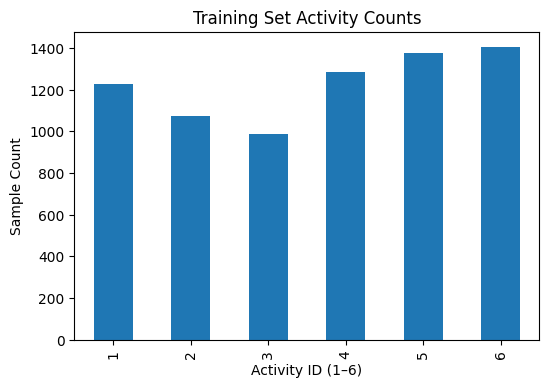

In [30]:
y_train[0].value_counts().sort_index().plot(kind='bar', figsize=(6,4))
plt.title("Training Set Activity Counts")
plt.xlabel("Activity ID (1–6)")
plt.ylabel("Sample Count")
plt.show()


In [31]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [32]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train.values.ravel())

RandomForestClassifier(random_state=42)

In [33]:
preds = model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, preds))
print(classification_report(
    y_test, preds,
    target_names=["WALKING","UPSTAIRS","DOWNSTAIRS","SITTING","STANDING","LAYING"]
))

Accuracy: 0.9267051238547676
              precision    recall  f1-score   support

     WALKING       0.89      0.97      0.93       496
    UPSTAIRS       0.90      0.89      0.90       471
  DOWNSTAIRS       0.96      0.87      0.91       420
     SITTING       0.91      0.90      0.90       491
    STANDING       0.91      0.92      0.91       532
      LAYING       1.00      1.00      1.00       537

    accuracy                           0.93      2947
   macro avg       0.93      0.92      0.93      2947
weighted avg       0.93      0.93      0.93      2947



In [34]:
activity_map = {
    1: "WALKING", 2: "WALKING_UPSTAIRS", 3: "WALKING_DOWNSTAIRS",
    4: "SITTING", 5: "STANDING", 6: "LAYING"
}

i = 0 
sample = X_test_scaled[i].reshape(1, -1)
pred = model.predict(sample)[0]
print(f"Sample #{i} predicted as {activity_map[pred]}")


Sample #0 predicted as STANDING


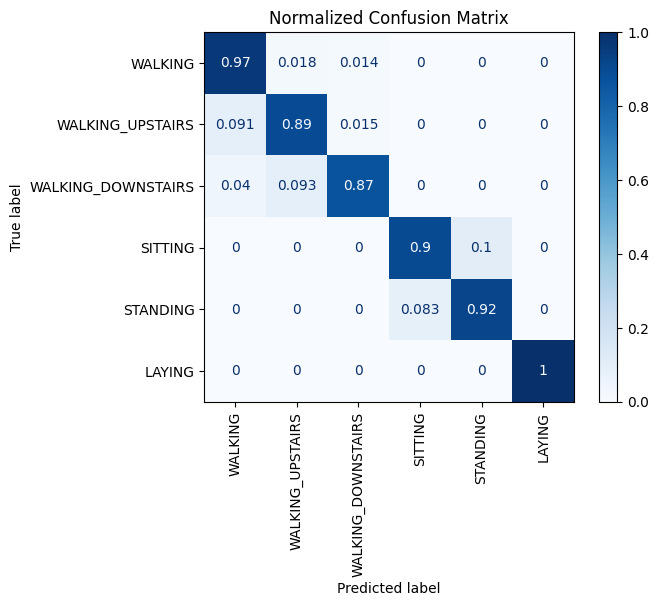

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_predictions(
    y_test, preds,
    display_labels=list(activity_map.values()),
    xticks_rotation='vertical', cmap='Blues', normalize='true'
)
plt.title("Normalized Confusion Matrix")
plt.show()


In [36]:
activity_map = {
    1: 'Walking',
    2: 'Walking Upstairs',
    3: 'Walking Downstairs',
    4: 'Sitting',
    5: 'Standing',
    6: 'Laying'
}

In [37]:
for i in range(5):
    print(f"Predicted: {activity_map[preds[i]]} | Actual: {activity_map[y_test.values[i][0]]}")

Predicted: Standing | Actual: Standing
Predicted: Standing | Actual: Standing
Predicted: Standing | Actual: Standing
Predicted: Standing | Actual: Standing
Predicted: Standing | Actual: Standing


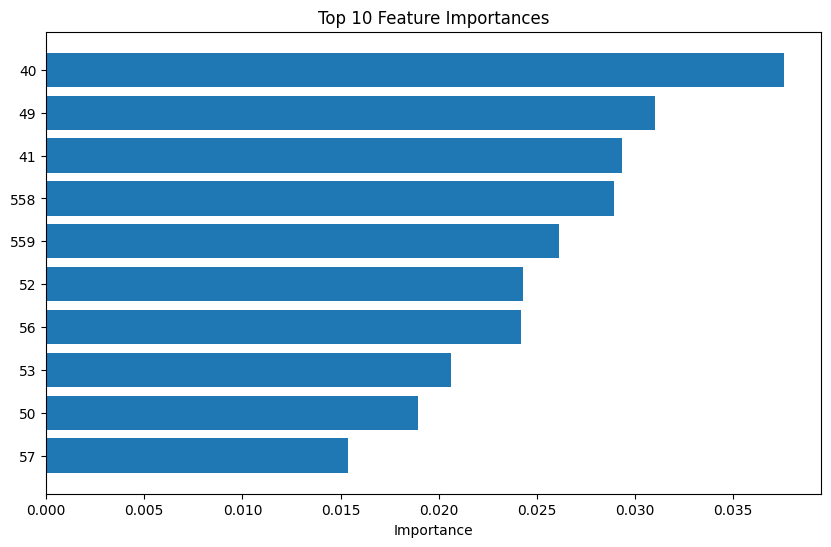

In [38]:
importances = model.feature_importances_
indices = np.argsort(importances)[-10:]

plt.figure(figsize=(10,6))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), indices)
plt.xlabel('Importance')
plt.title('Top 10 Feature Importances')
plt.show()

# 📒 Fitness Tracker ML
**Objective:** Classify human activities (walking, sitting, etc.) from smartphone accelerometer data using a Random Forest model.
